## Q1: Vector Shapes

In [ ]:
!pip install mapclassify #helper package
#import required packages
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Q1a

There are 5 Points, 3 LineStrings, and 1 Polygon.

### Q1b

In [ ]:
## DO NOT MODIFY THE CODE BELOW ##
# list of Points objects in the map
locations = [Point(40,80), Point(55,80), Point(55,70),Point(47.5,65)]

# list of LineString objects in the map
lines = [LineString([Point(55,90), Point(55, 70), Point(47.5,65), Point(40, 70), Point(40,90)]),
        LineString([Point(55,80),Point(65,80)]),
        LineString([Point(30,70), Point(65,70)])]

## END OF DO NOT MODIFY ##

# The Point object in map that is missing in the above list
missing_location = [Point(40,70)] ## YOU CODE GOES HERE ##

# The LineString object in map that is missing in the above list
missing_line = [LineString([Point(30,65),Point(65,65)])] ## YOU CODE GOES HERE ##

# The properties of the LineString
missing_line_properties = 'Train' ## YOU CODE GOES HERE ##

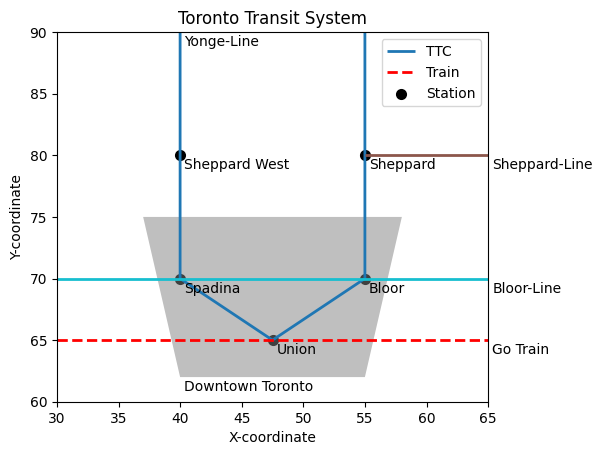

In [ ]:
# run the following code to plot the map
## DO NOT MODIFY THE FOLLOWING CODE ##
locations = [Point(40,80)] + missing_location + [Point(55,80), Point(55,70),Point(47.5,65)]
lines = [lines[0]] + missing_line + [lines[1], lines[2]]
locations_name = ['Sheppard West', 'Spadina', 'Sheppard','Bloor', 'Union']
# List of location properties
location_properties = ['Station' for i in range(len(locations))]
# List of line names
lines_name = ['Yonge-Line', 'Go Train', 'Sheppard-Line', 'Bloor-Line']
# List of line properties
line_properties = ['TTC', missing_line_properties, 'TTC', 'TTC']
# Ploygon
polygon = [Polygon([Point(40,62), Point(55, 62), Point(58,75),Point(37, 75)])]
polygon_name = ['Downtown Toronto']
polygon_properties = ['Area']
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'name': lines_name  + locations_name + polygon_name,
                       'properties': line_properties + location_properties + polygon_properties,
                       'geometry': lines + locations + polygon})
def plot_from_gdf(gdf) -> None:
    # given a GeoDataFrame, plot the geometries with different colors based on their properties
    # and annotate the name of the geometries
    for prop, color, linestyle, alpha in [('TTC', 'tab10', '-', 1), ('Train', 'red', '--', 1),
                                          ('Station', 'black', '-', 1), ('Area', 'grey', '-', 0.5)]:
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())

    switch = {
        Point: lambda s: (s.x, s.y),
        # if the shape is a polygon, annotate at the last point
        LineString: lambda s: (s.xy[0][-1], s.xy[1][-1]),
        # if the shape is a polygon, annotate at the first point
        Polygon: lambda s: (s.exterior.coords.xy[0][0], s.exterior.coords.xy[1][0])
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, -10), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    plt.ylim(60,90)
    plt.legend(['TTC', 'Train', 'Station'])
    plt.title('Toronto Transit System')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

plot_from_gdf(gdf)

### Q1c

part 1

In [ ]:
### YOUR CODE HERE ###
def get_all_location_within_area(gdf, area) -> None:

    # get the geometry of the area
    if isinstance(area, Polygon):
        geom_area = area
    else:
        geom_area = gdf[gdf['name'] == area].geometry.values[0]

    # iterate through the GeoDataFrame to find all the locations within the area
    for _, row in gdf.iterrows():
        if geom_area.contains(row.geometry) and isinstance(row.geometry, Point):
            print(row['name'], ' is within ', area)
get_all_location_within_area(gdf,'Downtown Toronto')

Spadina  is within  Downtown Toronto
Bloor  is within  Downtown Toronto
Union  is within  Downtown Toronto


part 2

In [ ]:
user_location = [Point(40,80), Point(40, 70), Point(55,80), Point(55,70),Point(47.5,65)]
### YOUR CODE HERE ###
def location_within_area(gdf, location, area) -> bool:
     #if given Point, use it, otherwise, get the geometry of the location
    geom_location = location if isinstance(location, Point) else gdf[gdf['name'] == location].geometry.values[0]
    geom_area = gdf[gdf['name'] == area].geometry.values[0]
    return geom_area.contains(geom_location)


for location in user_location:
    print(f'Is the location {location} within Downtown Toronto: ', location_within_area(gdf, location, 'Downtown Toronto'))

Is the location POINT (40 80) within Downtown Toronto:  False
Is the location POINT (40 70) within Downtown Toronto:  True
Is the location POINT (55 80) within Downtown Toronto:  False
Is the location POINT (55 70) within Downtown Toronto:  True
Is the location POINT (47.5 65) within Downtown Toronto:  True


## Q2: CRS and ShapeFiles

### Q2a

In [ ]:
### DO NOT CHANGE THE FOLLOWING CODE ###
#download the Shapefile
!wget https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
!os.mkdir('/content/cb_2018_us_state_500k')
!unzip cb_2018_us_state_500k.zip -d /content/cb_2018_us_state_500k

--2024-03-24 21:09:35--  https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip [following]
--2024-03-24 21:09:35--  https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip.4’

cb_2018_us_state_50 100%[===================>]   3.15M  13.7MB/s    in 0.2s    

2024-03-24 21:09:36 (13.7 MB/s) - ‘cb_2018_us_state_

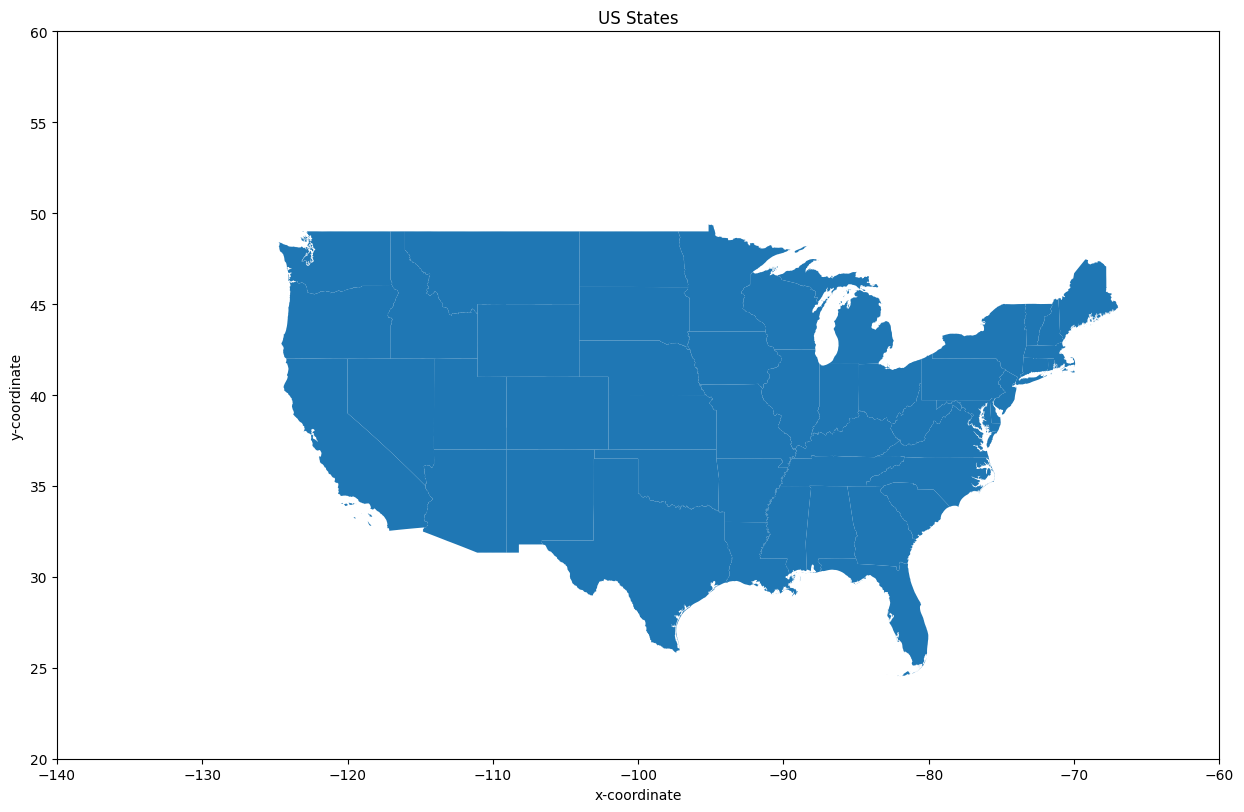

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
shape_file_location = 'cb_2018_us_state_500k' # location of the shapefile
### YOUR CODE HERE ###
gdf_states = gpd.read_file('cb_2018_us_state_500k')

### DO NOT CHANGE THE FOLLOWING CODE ###
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]


### YOUR CODE HERE ###
# plot the map
gdf_states.plot(figsize=(15, 15))
plt.xlim(-140, -60)
plt.ylim(20, 60)
plt.title('US States')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()
# check CRS
gdf_states.crs

The CRS used in this ShapeFile is EPSG:4269

### Q2b

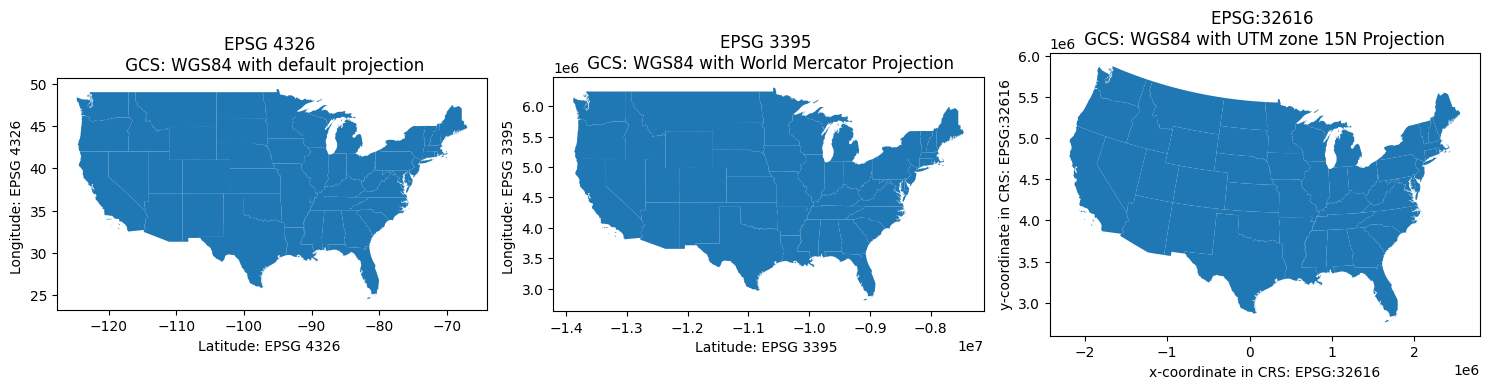

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax.flatten()

### YOUR CODE HERE ###
crs_options = [
    ("EPSG 4326 \n GCS: WGS84 with default projection", gdf_states.to_crs('EPSG:4326')),

    #EPSG code as a string
    ("EPSG 3395 \n GCS: WGS84 with World Mercator Projection", gdf_states.to_crs('EPSG:3395')),

    # Change CRS by name
    ("EPSG:32616 \n GCS: WGS84 with UTM zone 15N Projection ", gdf_states.to_crs("WGS 84 / UTM zone 15N")),


]


# Plot each CRS
for i, (title, gdf) in enumerate(crs_options):
    gdf.plot(ax=ax[i],figsize=(5, 5))
    ax[i].set_title(title)
    if i < 2:
      ax[i].set_xlabel('Latitude: ' + title[0:10])
      ax[i].set_ylabel('Longitude: ' + title[0:10])
    else:
      ax[i].set_xlabel('x-coordinate in CRS: ' + title[0:10])
      ax[i].set_ylabel('y-coordinate in CRS: ' + title[0:10])

# Show plot
plt.tight_layout()
plt.show()

I would choose the ESPG 4326 CRS as it keeps the same coordinate locations within the US.

### Q2c

In [ ]:
### YOUR CODE HERE ###
print("There are" , len(gdf_states['geometry']), "vector shapes in this file.")
polygon = gdf_states.geometry[4]
print('The Type of the Shape: ', polygon.geom_type)
print('Number of points in the polygon: ', len(polygon.exterior.xy[0]))
print('The bounds of the geometry: ', polygon.bounds)
print('Area: ', polygon.area)

There are 49 vector shapes in this file.
The Type of the Shape:  Polygon
Number of points in the polygon:  3880
The bounds of the geometry:  (-82.644739, 37.201482999999996, -77.71951899999999, 40.638801)
Area:  6.493879726220489


## Question 3: Choropleth By Popuplation

In [ ]:
### DO NOT MODIFY THE FOLLOWING CODE ###
# download the data and prepare the data
death_by_state = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
death_by_state = death_by_state.drop(columns = ['UID', 'iso2', 'iso3', 'code3',
                                                      'FIPS', 'Admin2', 'Country_Region',
                                                        'Lat', 'Long_', 'Combined_Key'])
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
death_by_state = death_by_state[death_by_state['Province_State'].isin(gdf_states['Province_State'])]
death_by_state = death_by_state.groupby('Province_State').sum().reset_index()
death_by_month = death_by_state.iloc[:, 2:].T
death_by_month.index = pd.to_datetime(death_by_month.index)
death_by_month = death_by_month.resample('M').last()
death_by_month = death_by_month.T.reset_index(drop=True)
death_by_month[['Province_State','Population']] = death_by_state[['Province_State', 'Population']]
#reorder the columns
death_by_month = death_by_month[['Province_State', 'Population'] + [x for x in death_by_month.columns[0:-2]]]
death_by_month.columns = ['Province_State', 'Population'] + [x.strftime('%m-%Y') for x in death_by_month.columns[2:]]
death_by_month.head()

,Province_State,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Alabama,4903185,0,0,23,272,630,950,1580,2182,...,19755,19891,20048,20422,20558,20652,20737,20870,20932,21032
1,Arizona,7278717,0,0,25,320,907,1645,3694,5029,...,30515,30768,31114,31370,31548,31751,32182,32775,33042,33102
2,Arkansas,3017804,0,0,8,61,133,270,453,797,...,11581,11719,11918,12165,12489,12564,12695,12852,12980,13020
3,California,39512223,0,0,170,2001,4113,5990,9124,12861,...,92163,93409,94794,95863,96793,97435,98544,99988,100726,101159
4,Colorado,5758736,0,0,69,1251,1612,1724,1867,1965,...,12918,13078,13166,13316,13421,13609,13882,14034,14106,14181


### Q3a

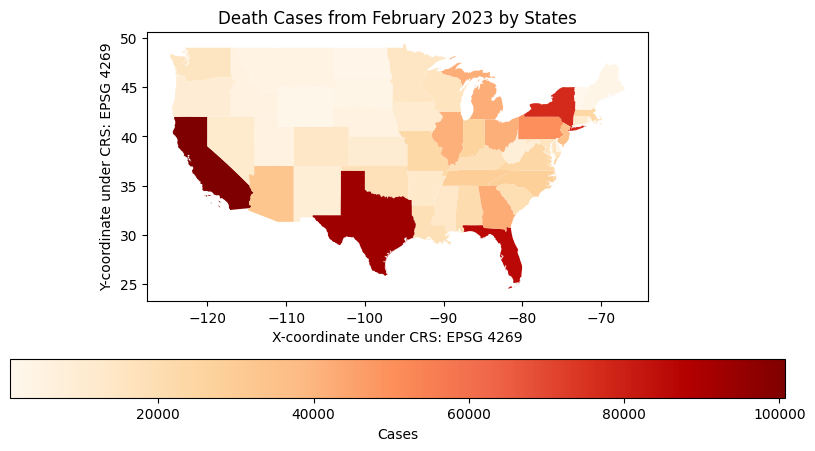

In [ ]:
gdf_states.to_crs(epsg=4269, inplace=True)

### YOUR CODE HERE ###
# DataFrame 'death_by_month' contains the dataset for this problem
gdf_death = gdf_states[['Province_State', 'geometry']].merge(death_by_month)#Merging DataFrame 'death_by_month' with GeoDataFrame 'gdf_states'. The merged GeoDataFrame should be stored in 'gdf_death'
# Merge the GeoDataFrame with the confirmed cases DataFrame based on the State name
#Make sure you convert the DataFrame to GeoDataFrame after merging (in default, it's a DataFrame)
gdf_covid_confirmed = gpd.GeoDataFrame(gdf_death)

gdf_death.plot(figsize=(10, 5), column='02-2023',
                         legend=True,cmap='OrRd',
                         legend_kwds={"label": "Cases", "orientation": "horizontal"}) # change the legend style
plt.title('Death Cases from February 2023 by States')
plt.xlabel('X-coordinate under CRS: EPSG 4269')
plt.ylabel('Y-coordinate under CRS: EPSG 4269')

plt.show()

California has the highest number of cumulative death cases and Wyoming has the least.

### Q3b

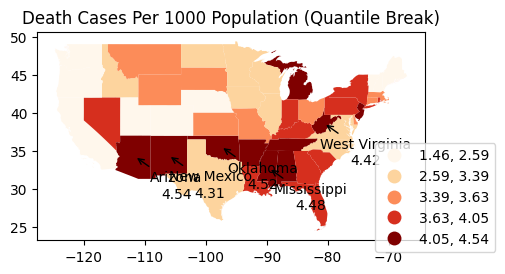

In [ ]:
### YOUR CODE HERE ###
current_month = gdf_death[['Province_State','02-2023','geometry','Population']]

# calculate the confirmed cases per 1000 people in the state
current_month['Density'] = current_month['02-2023'] / current_month['Population'] * 1000
current_month.plot(figsize=(5, 5), column='Density',scheme='quantiles',
                   cmap='OrRd',legend=True,
                   legend_kwds={"bbox_to_anchor": (1.2, 0.5)}) #ensure the legend does not block the map
# plot the boundary of the states
#gdf_covid_confirmed.boundary.plot(ax = ax[1], color='k', linewidth=0.5)
plt.title('Death Cases Per 1000 Population (Quantile Break)')
max_cases_state = current_month.nlargest(5, 'Density') # get the top 5 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Density']):
    plt.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                     textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.show()

There are many more states with high cumulative death cases than in the first choropleth. I think the second plot is more useful in this scenario as it reveals the states with the most death cases not just by numbers but by proportion of population.

## Question 4: Choropleth By Time

In [ ]:
### YOUR CODE HERE ###
def get_difference_between_timestamp(gdf) -> gpd.GeoDataFrame:
    # select columns that are not 'Province_State', 'geometry', and 'Population'
    col = [col for col in gdf.columns if col not in ['Province_State', 'geometry', 'Population']]
    gdf_newly_confirmed = gdf[col].diff(axis=1)
    # remove negative values (we only need the newly confirmed cases)
    gdf_newly_confirmed = gdf_newly_confirmed.clip(lower=0)
     # adding the first month's data
    gdf_newly_confirmed.iloc[:,0] = gdf[col[0]]
    # add the 'Province_State', 'geometry', and 'Population' columns
    gdf_newly_confirmed = gdf[['Province_State', 'geometry', 'Population']].join(gdf_newly_confirmed)
    # Every time we use a pandas function, we need to ensure that the result is
    # converted back to a GeoDataFrame if we intend to work with geographic data.
    gdf_newly_confirmed = gpd.GeoDataFrame(gdf_newly_confirmed)

    return gdf_newly_confirmed

gdf_newly_confirmed = get_difference_between_timestamp(gdf_death)
gdf_newly_confirmed.head()

,Province_State,geometry,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",2976149,0,0,20,241,473,339,590,...,58,123,146,118,56,68,61,128,95,50
1,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",10488084,0,0,12,394,531,443,562,...,565,274,852,190,428,418,258,411,306,86
2,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",3956971,0,0,23,199,112,53,154,...,0,811,392,262,194,154,158,240,235,85
3,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",8535519,0,0,27,525,823,388,411,...,209,320,498,433,350,219,252,465,514,17
4,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",1792147,0,0,1,40,34,18,23,...,116,92,130,130,106,89,61,177,77,34


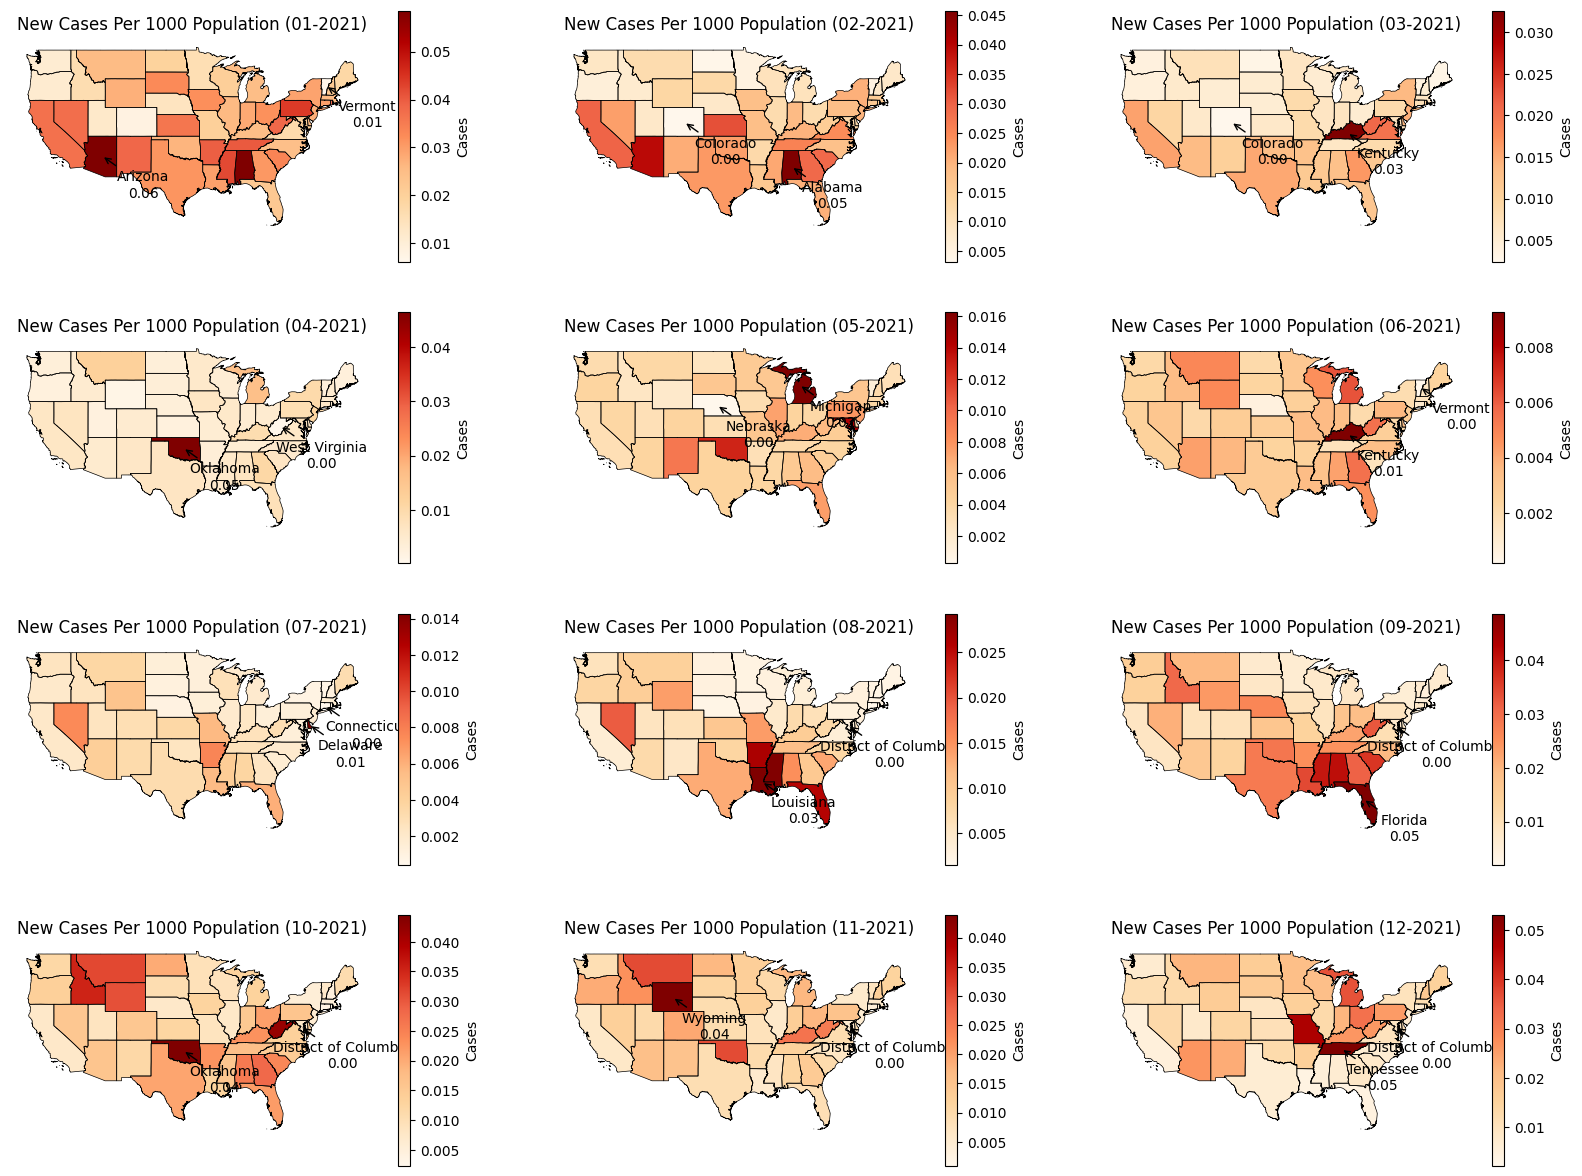

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
## YOUR CODE HERE ##
def choropleth_by_month(gdf, year, ax, title) -> None:
    # get year data
    current_year = [col for col in gdf.columns if year in col]
    # plot the data
    for i, month in enumerate(current_year):
        # select the month and calculate the density
        gdf_density = gdf[['Province_State', month, 'geometry',
                           'Population']]
        # calculate the density
        gdf_density['Density'] = gdf_density[month] / (gdf_density['Population']) * 100
        # plot the data
        gdf_density.plot(ax=ax[i], column='Density',
                         cmap='OrRd',legend=True,legend_kwds={"label": "Cases"})

        # plot the boundary of the states
        gdf.boundary.plot(ax = ax[i], color='k', linewidth=0.5)

        # label states with the highest and lowest cases per 100 population
        max_cases_state = gdf_density.nlargest(1, 'Density')
        min_cases_state = gdf_density.nsmallest(1, 'Density')

        for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                                     max_cases_state.geometry.centroid.y,
                                     max_cases_state['Province_State'],
                                     max_cases_state['Density']):
            ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                           textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        for x, y, name, value in zip(min_cases_state.geometry.centroid.x,
                                        min_cases_state.geometry.centroid.y,
                                        min_cases_state['Province_State'],
                                        min_cases_state['Density']):
                ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                            textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        ax[i].set_title(title + f' ({month})')
        ax[i].set_axis_off()
    plt.show()

# plot the new death cases per 1000 population from 01-2021 to 12-2021

choropleth_by_month(gdf_newly_confirmed, '-2021',ax,
                    title='New Cases Per 1000 Population')

Florida and Wyoming tend to have very high new death cases some months, and lower new death cases in others.



### Q4b

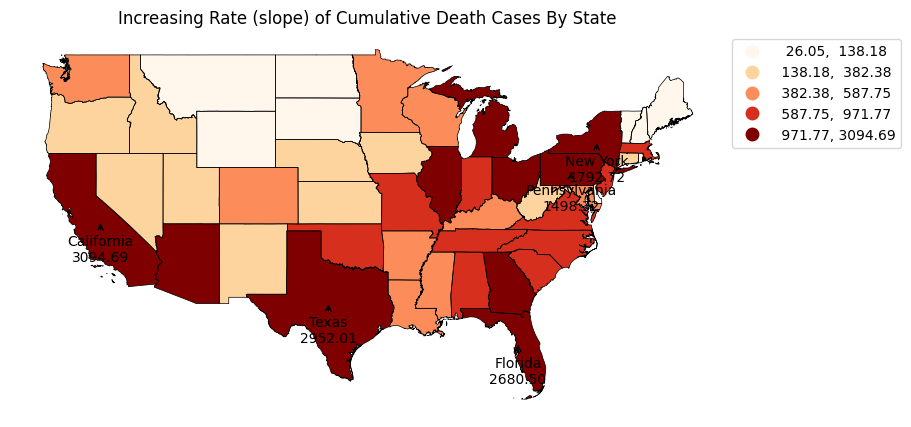

In [ ]:
### YOUR CODE HERE ###
def linear_regression(sample):
    x = range(len(sample))
    y = sample
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    # Calculate the slope (m) and intercept (b) of the regression line
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = sum((xi - mean_x) ** 2 for xi in x)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return slope, intercept
gdf_increase_rate = gdf_covid_confirmed.copy()
# calculate the slope for each state
col = [col for col in gdf_increase_rate.columns if col not in ['Province_State', 'geometry', 'Population']]
gdf_increase_rate['slope'] = gdf_increase_rate.apply(lambda x: linear_regression(x[col])[0], axis=1)
# choropleth based on the slope
gdf_increase_rate.plot(figsize=(10, 5), column='slope', cmap='OrRd',
                       legend=True,scheme='quantiles',
                         legend_kwds={"bbox_to_anchor": (1, 1),
                                      'loc': 'upper left'})
gdf_increase_rate.boundary.plot(color='k', linewidth=0.5,ax = plt.gca())

# label the top 2 states with the highest increase rate
max_cases_state = gdf_increase_rate.nlargest(5, 'slope') # get the top 2 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['slope']):
    plt.gca().annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(0, -30),
                     textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Increasing Rate (slope) of Cumulative Death Cases By State')
plt.axis('off')
plt.show()



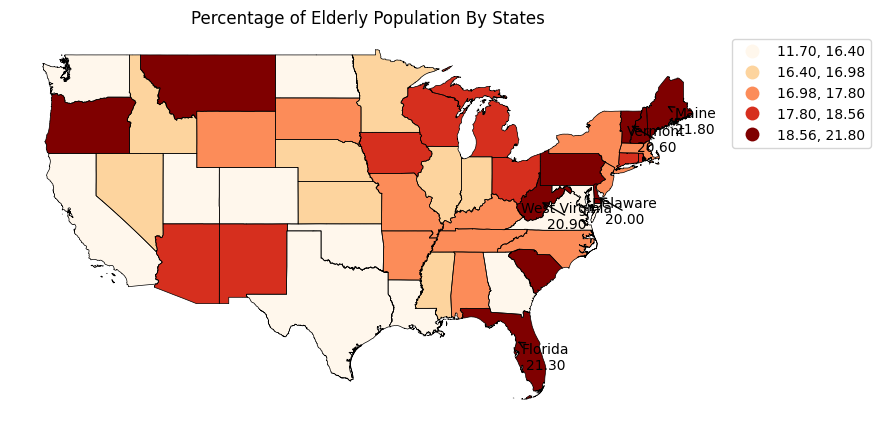

In [ ]:
### DO NOT MODIFY ###
# run the code the plot the precentage of population aged 65+ by states choropleth
elder_population = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/elder_population.csv')[['State','Population Ages 65+ (percent of state population)']]
elder_population.columns = ['Province_State', 'Elderly']
# read the shapefile
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
gdf_elder = gdf_states.merge(elder_population)
gdf_elder.plot(column='Elderly', cmap='OrRd', legend=True, figsize=(10, 5), scheme='quantiles',
               legend_kwds={"bbox_to_anchor": (1, 1),'loc': 'upper left'})
gdf_elder.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)
# label the top 5 states with precentage of elderly population
max_cases_state = gdf_elder.nlargest(5, 'Elderly') # get the top 5 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Elderly']):
    plt.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Percentage of Elderly Population By States')
plt.axis('off')
plt.show()


Florida supports this claim as it has high elderly population percentage and cumulative death cases. Texas contradicts this as it has high cumulative death cases but low percentage of elderly population.
